In [40]:
#Imports:

import numpy as np                # import numpy
import pandas as pd               # import pandas

import matplotlib.pyplot as plt   # import matplotlib
#import seaborn as sns             # import seaborn

import missingno as msno          # import missingno

%matplotlib inline

In [42]:
# Read in the train and test data files
train = pd.read_csv('../datasets/train.csv')
test  = pd.read_csv('../datasets/test.csv')

In [7]:
# Display train data and shape
print(train.shape)
train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


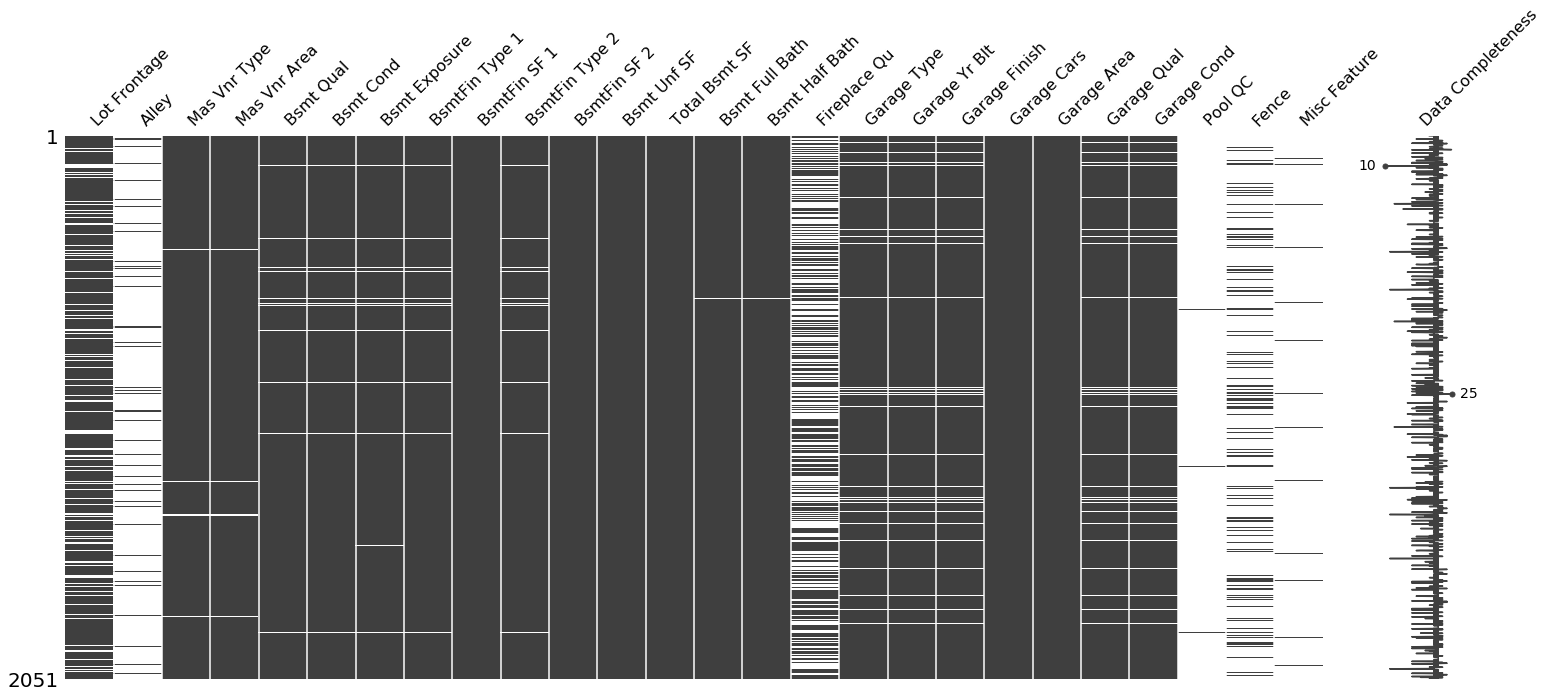

In [10]:
# Import missingno
import missingno as msno  

# Create list of columns that contain a null value in the train data
null_cols_train = list(train.isnull().sum()[train.isnull().sum() != 0].keys())

# Visualize missing values by column using missingo matrix
msno.matrix(train[null_cols_train], labels=True);

In [14]:
# Take a look at the 'Alley' column where there are a lot of null values
print(train['Alley'].value_counts())

# Number of nulls in 'Alley' column
print('Nulls: ', train['Alley'].isnull().sum())

Grvl    85
Pave    55
Name: Alley, dtype: int64
Nulls:  1911


In [18]:
# List of columns where 'NA' is a valid value (need NaN to be 'NA')
# List created from Data Dictionary
na_cols = ['Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 
           'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']

In [21]:
# Replace NaNs with 'NA'
for column in na_cols:
    train[column].fillna('NA', inplace = True)

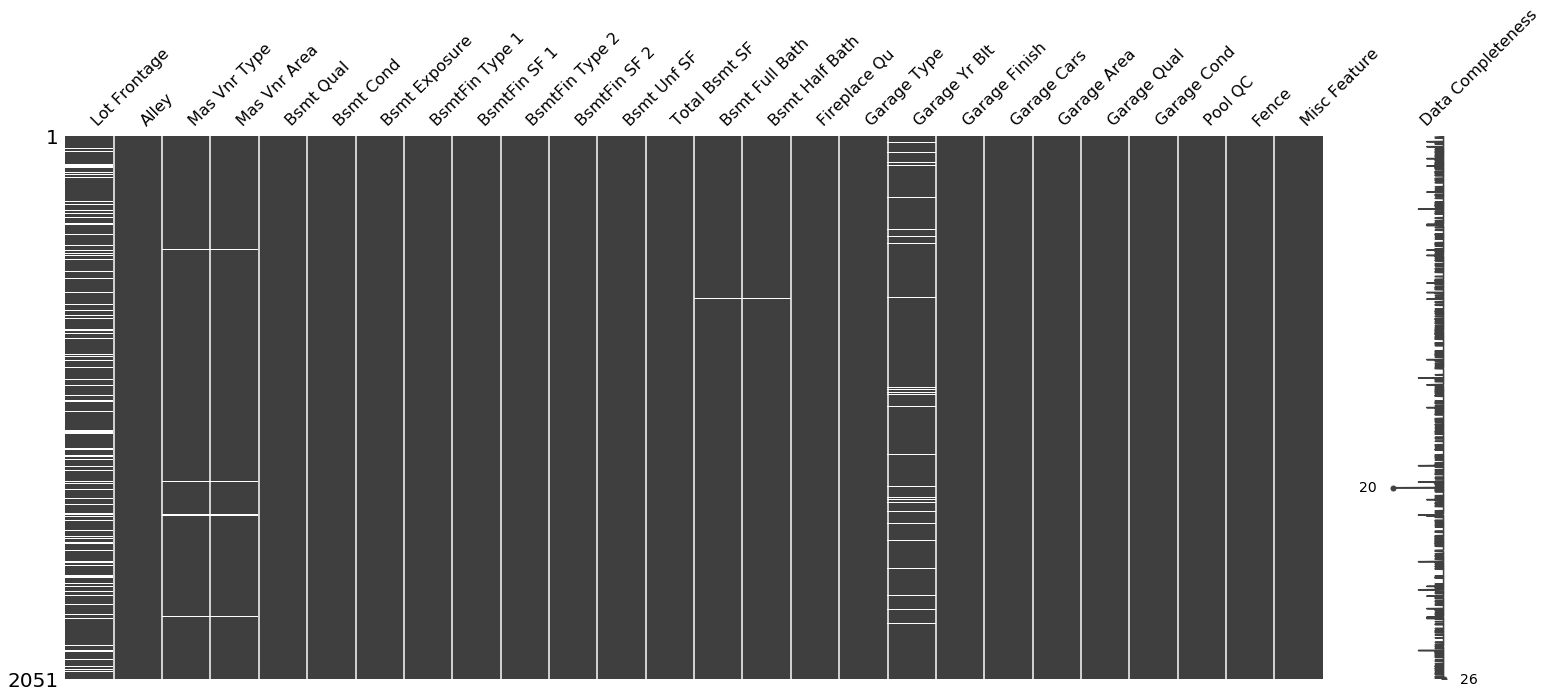

In [22]:
msno.matrix(train[null_cols_train], labels=True);

FILL IN REMAINING BASEMENT COLUMNS

In [23]:
# Looking at the few few remaining missing values in 'Bsmt' Columns (Train)
basement_columns = [column for column in train.columns if 'bsmt' in column.lower()]
train[train['Bsmt Full Bath'].isnull()][basement_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN
1327,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN


In [25]:
# Bsmt Qual = NA means no basement(Data Dictionary)...look at how other columns are filled when no basement
train[train['Bsmt Qual'] == 'NA'][basement_columns].head(3)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
93,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
114,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0


In [26]:
# Based on other rows with no basement, these NAs on row 616 and 1327 should be 0.0
for col in ['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']:
    train.loc[616, col] = 0.0
    train.loc[1327, col] = 0.0

In [27]:
train[train['Bsmt Qual'] == 'NA'][basement_columns].head(3)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
93,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
114,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0


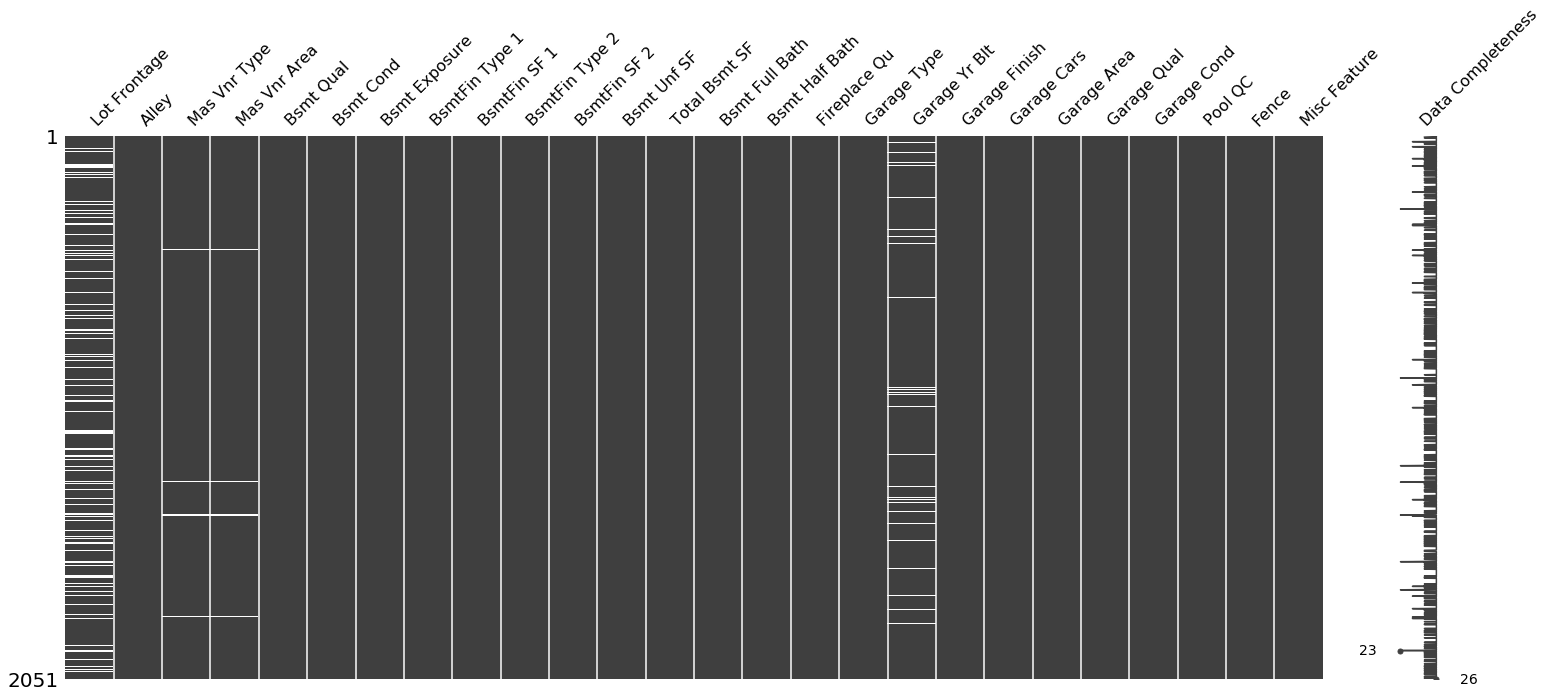

In [28]:
msno.matrix(train[null_cols_train], labels=True);

FILL IN MAS VNR MISSING COLUMNS

In [33]:
# Looking at 'Mas Vnr' (Masonry Veneer) columns (Train)
ext_columns = [column for column in train.columns if 'vnr' in column.lower() or 'ext' in column.lower()]
train[train['Mas Vnr Type'].isnull()][ext_columns]

,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond
22,CemntBd,CmentBd,NaN,NaN,Gd,TA
41,VinylSd,VinylSd,NaN,NaN,Ex,TA
86,VinylSd,VinylSd,NaN,NaN,Gd,TA
212,VinylSd,VinylSd,NaN,NaN,Gd,TA
276,VinylSd,VinylSd,NaN,NaN,TA,TA
338,WdShing,Wd Shng,NaN,NaN,Gd,TA
431,VinylSd,VinylSd,NaN,NaN,Gd,TA
451,VinylSd,VinylSd,NaN,NaN,Gd,TA
591,VinylSd,VinylSd,NaN,NaN,Gd,TA
844,VinylSd,VinylSd,NaN,NaN,Gd,TA


In [32]:
# Look at other rows where Exterior 1st = VinylSd
train[train['Exterior 1st'] == 'VinylSd'][ext_columns].head(10)

,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond
1,VinylSd,VinylSd,BrkFace,132.0,Gd,TA
2,VinylSd,VinylSd,None,0.0,TA,Gd
3,VinylSd,VinylSd,None,0.0,TA,TA
6,VinylSd,VinylSd,BrkFace,82.0,TA,TA
11,VinylSd,VinylSd,None,0.0,Gd,TA
14,VinylSd,VinylSd,None,0.0,Gd,TA
15,VinylSd,VinylSd,None,0.0,TA,TA
17,VinylSd,VinylSd,None,0.0,TA,TA
19,VinylSd,VinylSd,None,0.0,TA,TA
20,VinylSd,VinylSd,None,0.0,TA,TA


In [ ]:
# According to the Data Dictionary:
    
    # MasVnrType: Masonry veneer type
        # BrkCmn Brick Common
        # BrkFace Brick Face
        # CBlock Cinder Block
        # None None
        # Stone Stone

In [34]:
# There is no clear way to fill in these rows...since it is only 22 rows out of 2050 (1.07%) I will drop these rows
rows_to_drop = list(train[train['Mas Vnr Type'].isnull()].index)
train.drop(labels = rows_to_drop, inplace=True)

In [35]:
# Verify that 22 rows were dropped (2050 - 22 = 2028)
train.shape

(2029, 81)

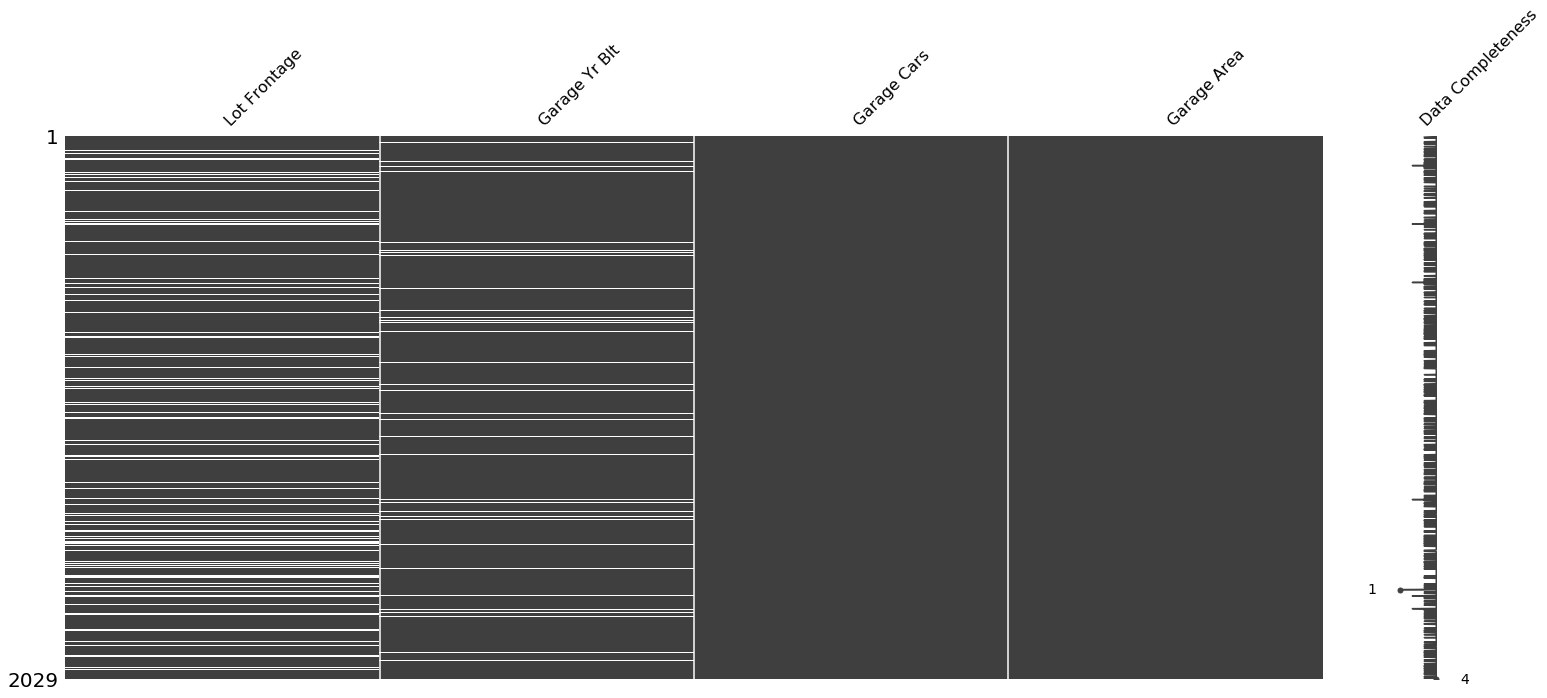

In [37]:
# Create list of columns that contain a null value in the train data
null_cols_train = list(train.isnull().sum()[train.isnull().sum() != 0].keys())
msno.matrix(train[null_cols_train], labels=True);

In [45]:
train['Garage Yr Blt'].sort_values().value_counts()

2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
1977.0     46
1998.0     45
2008.0     44
2000.0     41
2002.0     40
1999.0     39
1976.0     35
1993.0     34
1978.0     33
1968.0     32
1958.0     32
1950.0     32
1956.0     31
1996.0     31
1966.0     29
2001.0     27
1965.0     27
1995.0     26
1967.0     26
1997.0     26
1954.0     25
1975.0     25
1962.0     25
1979.0     25
1994.0     25
         ... 
1942.0      6
1982.0      6
1925.0      6
1922.0      6
1938.0      6
1928.0      6
1910.0      5
1916.0      5
1946.0      5
1923.0      5
1921.0      4
1927.0      4
1915.0      4
1937.0      4
1924.0      4
1900.0      3
1931.0      3
1947.0      3
1914.0      2
1929.0      2
1934.0      2
2010.0      2
1932.0      2
1918.0      1
1933.0      1
1919.0      1
1895.0      1
2207.0      1
1917.0      1
1896.0      1
Name: Garage Yr Blt, Length: 100, dtype: int64

In [41]:
# I will turn 'Garage Yr Blt' into 'Garage Age' where 2019-Year = Age and for NaN I will say 
garage_columns = [column for column in train.columns if 'garage' in column.lower()]
train['Garage Yr Blt'] = train['Garage Yr Blt'].map(lambda x: 0 if np.isnan(x) else 2019 - x)

# Rename column names to 'Garage Age'
#train.rename(columns={'Garage Yr Blt': 'Garage Age'}, inplace=True)

#garage_columns.
train[garage_columns].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,43.0,RFn,2.0,475.0,TA,TA
1,Attchd,22.0,RFn,2.0,559.0,TA,TA
2,Detchd,66.0,Unf,1.0,246.0,TA,TA
3,BuiltIn,12.0,Fin,2.0,400.0,TA,TA
4,Detchd,62.0,Unf,2.0,484.0,TA,TA
